# Imputation

- The process of filling in missing data with a given statistical method is known as imputation and comes in a variety of flavors.

![image.png](attachment:image.png)

**Missing Completely At Random (MCAR)**
The missing data is not related to any observed or unobserved data, i.e., the probability of data missing is the same for all observations. We can say that there is no predictable pattern behind the missingness. This type is the easiest to handle. You can simply drop the rows affected if and only if the percentage of the missing data is relatively small, or you can use the fillna () method with the mean, median, or most-frequent options

**Missing At Random (MAR)**
The probability of data missing is related or dependent on the observed data. There is some relationship between the missing data and one or more of the observed data.

**Missing Not At Random (MNAR)**
probability of data missing is related to the unobserved data

# Common Imputation Methods

- Filling in missing data with either the mean or median of a given variable based on the data that does exist
- If the data is skewed one way or the other, the median is likely more appropriate.
- if the data is normally distributed can use either the mean or the median as both will be relatively the same

## Using NumPy and Pandas


In [ ]:

import numpy as np
import pandas as pd

df = pd.DataFrame({'A': [1, 2, np.nan, 4, 5],
                   'B': [1, 7, 7, 7, np.nan]})

A_mean = np.nanmean(df.A)
B_median = np.nanmedian(df.B)

df.A.fillna(A_mean, inplace=True)
df.B.fillna(B_median, inplace=True)
df

<ipython-input-1-8c3109411d78>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.A.fillna(A_mean, inplace=True)
<ipython-input-1-8c3109411d78>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({c

,A,B
0,1.0,1.0
1,2.0,7.0
2,3.0,7.0
3,4.0,7.0
4,5.0,7.0


## Using SimpleImputer

**strategy** argument:

- "mean" – replaces missing values with the mean
- "median" – replaces missing values with the median
- "most_frequent" – replaces missing values with the most frequent value
- "constant" – replaces missing values with whatever value is specified in the fill_value argument. This could be useful in a scenario in which you want to replace missing values with a string saying "missing" rather than an actual value.



In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.DataFrame({'A': [2, 2, np.nan, np.nan, np.nan, 8]})

imputer = SimpleImputer(strategy='mean')
imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(imputed, columns=df.columns)

df_imputed

,A
0,2.0
1,2.0
2,4.0
3,4.0
4,4.0
5,8.0


## Iterative Imputation

- Useful only when working with multivariate data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df = pd.DataFrame({'A': [2, 3, np.nan, 5],
                   'B': [np.nan, 9, 16, 25]})

# Setting the random_state argument for reproducibility
imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(imputed, columns=df.columns)

round(df_imputed, 2)

,A,B
0,2.00,1.0
1,3.00,9.0
2,3.87,16.0
3,5.00,25.0


In [ ]:
# weatherAUS Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.metrics import mean_squared_error

In [ ]:
sns.set_theme(style='darkgrid')

In [ ]:
# Reading in the data and selecting the continous features
df = pd.read_csv('weatherAUS.csv')
cont_feats = [col for col in df.columns if df[col].dtype != object]
print(df.head(), cont_feats)

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
# Mean Imputation
mean_imputer = SimpleImputer(strategy='mean')
mean_imputed = mean_imputer.fit_transform(df[cont_feats])
df_mean_imputed = pd.DataFrame(mean_imputed, columns=cont_feats)

In [ ]:
df_mean_imputed.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,5.212366,7.327101,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.700963,16.9,21.8
1,7.4,25.1,0.0,5.212366,7.327101,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.619472,4.700963,17.2,24.3
2,12.9,25.7,0.0,5.212366,7.327101,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.619472,2.000000,21.0,23.2
3,9.2,28.0,0.0,5.212366,7.327101,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.619472,4.700963,18.1,26.5
4,17.5,32.3,1.0,5.212366,7.327101,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7


In [ ]:
# Median Imputation
median_imputer = SimpleImputer(strategy='median')
median_imputed = median_imputer.fit_transform(df[cont_feats])
df_median_imputed = pd.DataFrame(median_imputed, columns=cont_feats)

In [ ]:
df_median_imputed.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,4.4,8.1,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8
1,7.4,25.1,0.0,4.4,8.1,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,6.0,5.0,17.2,24.3
2,12.9,25.7,0.0,4.4,8.1,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,6.0,2.0,21.0,23.2
3,9.2,28.0,0.0,4.4,8.1,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,6.0,5.0,18.1,26.5
4,17.5,32.3,1.0,4.4,8.1,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [ ]:
# Iterative Imputation
iter_imputer = IterativeImputer(random_state=42)
iter_imputed = iter_imputer.fit_transform(df[cont_feats])
df_iter_imputed = pd.DataFrame(iter_imputed, columns=cont_feats)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
df_iter_imputed.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,6.193907,6.814880,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.063406,16.9,21.8
1,7.4,25.1,0.0,6.310075,11.090843,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.590877,2.693229,17.2,24.3
2,12.9,25.7,0.0,8.356588,12.048978,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,1.573181,2.000000,21.0,23.2
3,9.2,28.0,0.0,6.946435,11.973701,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,1.046157,2.148605,18.1,26.5
4,17.5,32.3,1.0,7.513485,5.471065,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7


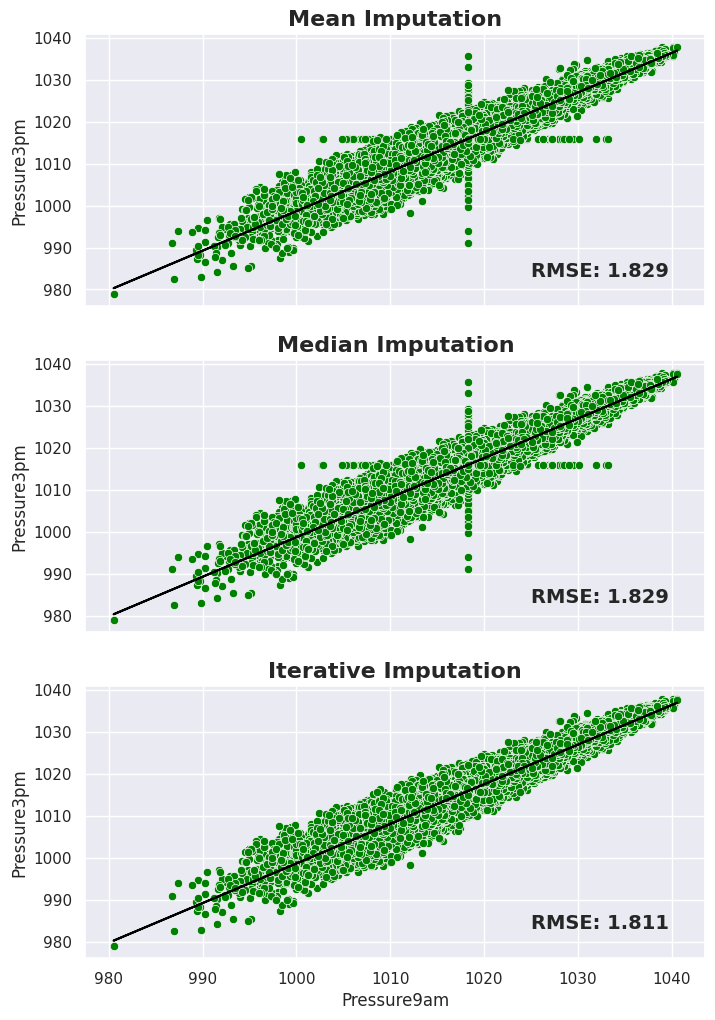

In [ ]:
# Plotting a comparison between the different strategies
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(8, 12))
axes = np.reshape(axes, -1)

dfs = [df_mean_imputed, df_median_imputed, df_iter_imputed]
titles = ['Mean Imputation', 'Median Imputation', 'Iterative Imputation']

for i, df in enumerate(dfs):
    # Plotting the data
    x = df.Pressure9am
    y = df.Pressure3pm
    sns.scatterplot(x=x, y=y, ax=axes[i], color='green')

    # Fitting and plotting a linear regression line
    m, b = np.polyfit(x, y, 1)
    linreg = m*x + b
    axes[i].plot(x, linreg, color='black')

    # Setting the titles and including the RMSE values
    axes[i].set_title(titles[i], fontsize=16, fontweight='bold')
    rmse = round(np.sqrt(mean_squared_error(y, linreg)), 3)
    axes[i].text(1025, 983, f'RMSE: {rmse}', fontsize=14, fontweight='bold')

# Games Dataset

In [1]:
# import the libraries you need
import pandas as pd
import numpy as np

#explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer

# import normally from sklearn.impute
from sklearn.impute import IterativeImputer

In [4]:
# read data and make a copy
video_games = pd.read_csv('Video_Games.csv')
games = video_games.copy()

games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# formatting column names
games.columns = games.columns.str.lower().str.strip()

# checking for data types
games.dtypes

#for more insights into the extent of these missing values across
round((games.isnull().sum()/len(games))*100).sort_values(ascending=False)

,0
user_count,55.0
critic_count,51.0
critic_score,51.0
user_score,40.0
rating,40.0
developer,40.0
year_of_release,2.0
name,0.0
jp_sales,0.0
eu_sales,0.0


In [7]:
for col in ['user_score', 'user_count', 'critic_score', 'critic_count']:
    games[col] = pd.to_numeric(games[col], errors='coerce')

In [8]:
# creating an itertiveimputer object
iterative_imputer = IterativeImputer()

# applying the iterator object
imputed_data = iterative_imputer.fit_transform(games[['user_score','user_count','critic_score', 'critic_count']])
games.loc[:, ['user_score','user_count','critic_score', 'critic_count']] = imputed_data

games.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.00000,51.00000,8.000000,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.65319,26.13186,7.053335,135.258779,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.00000,73.00000,8.300000,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.00000,73.00000,8.000000,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.65319,26.13186,7.053335,135.258779,NaN,NaN


In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

# creating an itertiveimputer object
iterative_imputer = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=100,
                                                                   min_samples_leaf=1,
                                                                   min_samples_split=4,
                                                                   random_state=0),
                                     max_iter=20,
                                     tol=1e-2,
                                     initial_strategy='median',
                                     verbose=True,
                                     random_state=0)
#applying the iterator object
imputed_data = iterative_imputer.fit_transform(games[['user_score','user_count','critic_score', 'critic_count']])
games.loc[:, ['user_score','user_count','critic_score', 'critic_count']] = imputed_data

games.head()


[IterativeImputer] Completing matrix with shape (16719, 4)
[IterativeImputer] Change: 0.0, scaled tolerance: 106.65 
[IterativeImputer] Early stopping criterion reached.


,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.00000,51.00000,8.000000,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.65319,26.13186,7.053335,135.258779,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.00000,73.00000,8.300000,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.00000,73.00000,8.000000,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.65319,26.13186,7.053335,135.258779,NaN,NaN


# Reference

- https://towardsdatascience.com/iterative-imputation-with-scikit-learn-8f3eb22b1a38/

- https://towardsdatascience.com/iterative-imputation-with-scikit-learn-8f3eb22b1a38/

- https://medium.com/learning-data/iterative-imputer-for-missing-values-in-machine-learning-32bd8b5b697a